# PROJECT 2 - Data Analysis

For Project 2, I decided to use **my own hockey dataset**, my classmate **Nicholas Velasquez's baseball dataset**, and my other classmate **Husam Abdelrahim's student test dataset**. I chose these due to the simplicity of the dataset, and because my classmates' posts were well-written.

___________________________________________________________________________________________________________________________

In [449]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

___________________________________________________________________________________________________________________________

First, I'm going to write each dataset into a .csv file. Technically, this step was not necessary for these datasets because the authors had already provided the raw .csv files, but since this was asked for in the instructions, I will be going through with it anyway.

In [450]:
#Writing the first dataset into a CSV file
data1 = [
    ["", "", "", "", "", "Scoring", "Scoring", "Scoring", "", "", "Goals", "Goals", "Goals", "Goals", "Assists", "Assists", "Assists", "Shots on Goal", "Shots on Goal", "", "", "", "", "", "", ""],
    ["Date", "Team", "", "Opp", "Result", "G", "A", "PTS", "+/-", "PIM", "EV", "PPG", "SHG", "GWG", "EV", "PP", "SH", "SOG", "SPCT", "SHFT", "TOI", "HIT", "BLK", "FOW", "FOL", "FO%"],
    ["2025-03-01", "EDM", "@", "CAR", "W 3-1", 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0.0, 23, "24:42", 0, 2, 5, 5, 50.0],
    ["2025-02-27", "EDM", "@", "FLA", "L 3-4", 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0.0, 23, "22:46", 1, 0, 5, 6, 45.5],
    ["2025-02-25", "EDM", "@", "TBL", "L 1-4", 0, 1, 1, -1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0.0, 22, "20:30", 2, 1, 9, 7, 56.3],
    ["2025-02-23", "EDM", "@", "WSH", "L 3-7", 0, 1, 1, -3, 0, 0, 0, 0, 0, 0, 1, 0, 0, "", 21, "20:17", 0, 1, 4, 6, 40.0],
    ["2025-02-22", "EDM", "@", "PHI", "L 3-6", 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0.0, 20, "19:59", 1, 0, 6, 7, 46.2]
]

#Write to a CSV file
with open("hockey_stats.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data1)

print("CSV file 'hockey_stats.csv' has been created successfully.")

CSV file 'hockey_stats.csv' has been created successfully.


In [451]:
#Writing the second dataset into a CSV file
data2 = [
    ["Season", "Age", "Team", "Lg", "WAR", "G", "PA", "AB", "R", "H", "2B", "3B", "HR", "RBI", "SB", "CS", "BB", "SO", "BA", "OBP", "SLG", "OPS", "OPS+", "rOBA", "Rbat+", "TB", "GIDP", "HBP", "SH", "SF", "IBB", "Pos", "Awards"],
    ["2016", "24", "NYY", "AL", "-0.3", "27", "95", "84", "10", "15", "2", "0", "4", "10", "0", "1", "9", "42", ".179", ".263", ".345", ".608", "61", ".272", "60", "29", "2", "1", "0", "1", "0", "9/H", ""],
    ["2017", "25", "NYY", "AL", "8.0", "155", "678", "542", "128", "154", "24", "3", "52", "114", "9", "4", "127", "208", ".284", ".422", ".627", "1.049", "171", ".435", "172", "340", "15", "5", "0", "4", "11", "*9D/H", "ASMVP-2ROY-1SS"],
    ["2018", "26", "NYY", "AL", "5.9", "112", "498", "413", "77", "115", "22", "0", "27", "67", "6", "3", "76", "152", ".278", ".392", ".528", ".919", "150", ".396", "152", "218", "10", "4", "0", "5", "3", "9D/H8", "ASMVP-12"],
    ["2019", "27", "NYY", "AL", "5.6", "102", "447", "378", "75", "103", "18", "1", "27", "55", "3", "2", "64", "141", ".272", ".381", ".540", ".921", "143", ".393", "148", "204", "11", "3", "0", "1", "4", "9D/H", ""],
    ["2020", "28", "NYY", "AL", "1.1", "28", "114", "101", "23", "26", "3", "0", "9", "22", "0", "1", "10", "32", ".257", ".336", ".554", ".891", "143", ".379", "145", "56", "5", "2", "0", "0", "0", "9/DH", ""],
    ["2021", "29", "NYY", "AL", "6.1", "148", "633", "550", "89", "158", "24", "0", "39", "98", "6", "1", "75", "158", ".287", ".373", ".544", ".916", "149", ".392", "150", "299", "16", "3", "0", "5", "2", "*98D/H", "ASMVP-4SS"],
    ["2022", "30", "NYY", "AL", "10.5", "157", "696", "570", "133", "177", "28", "0", "62", "131", "16", "3", "111", "175", ".311", ".425", ".686", "1.111", "210", ".463", "208", "391", "14", "6", "0", "5", "19", "*89D/H", "ASMVP-1SS"],
    ["2023", "31", "NYY", "AL", "4.5", "106", "458", "367", "79", "98", "16", "0", "37", "75", "3", "1", "88", "130", ".267", ".406", ".613", "1.019", "175", ".421", "172", "225", "5", "0", "0", "3", "9", "9D8/H", "ASMVP-15"],
    ["2024", "32", "NYY", "AL", "10.8", "158", "704", "559", "122", "180", "36", "1", "58", "144", "10", "0", "133", "171", ".322", ".458", ".701", "1.159", "223", ".484", "223", "392", "22", "9", "0", "2", "20", "*8D/97", "ASMVP-1SS"],
    ["9 Yrs", "9 Yrs", "9 Yrs", "9 Yrs", "52.2", "993", "4323", "3564", "736", "1026", "173", "5", "315", "716", "53", "16", "693", "1209", ".288", ".406", ".604", "1.010", "173", ".425", "174", "2154", "100", "33", "0", "26", "68", "98DH/7", ""],
    ["162 Game Avg", "162 Game Avg", "162 Game Avg", "162 Game Avg", "8.5", "162", "705", "581", "120", "167", "28", "1", "51", "117", "9", "3", "113", "197", ".288", ".406", ".604", "1.010", "173", ".425", "174", "351", "16", "5", "0", "4", "11", "", ""]
]

#Write to CSV file
with open("baseball_stats.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data2)

print("CSV file 'baseball_stats.csv' created successfully!")


CSV file 'baseball_stats.csv' created successfully!


In [452]:
#Writing the third  dataset into a CSV file
data3 = [
    ["id", "name", "phone", "sex and age", "test number", "term 1", "term 2", "term 3"],
    [1, "Mike", 134, "m_12", "test 1", 76, 84, 87],
    [2, "Linda", 270, "f_13", "test 1", 88, 90, 73],
    [3, "Sam", 210, "m_11", "test 1", 78, 74, 80],
    [4, "Esther", 617, "f_12", "test 1", 68, 75, 74],
    [5, "Mary", 114, "f_14", "test 1", 65, 67, 64],
    [1, "Mike", 134, "m_12", "test 2", 85, 80, 90],
    [2, "Linda", 270, "f_13", "test 2", 87, 82, 94],
    [3, "Sam", 210, "m_11", "test 2", 80, 87, 80],
    [4, "Esther", 617, "f_12", "test 2", 70, 75, 78],
    [5, "Mary", 114, "f_14", "test 2", 68, 70, 63]
]

#Write to CSV file
with open("students_data.csv", "w", newline="") as file:
    writer = csv.writer(file, quoting=csv.QUOTE_ALL)
    writer.writerows(data3)

print("CSV file 'students_data.csv' created successfully!")


CSV file 'students_data.csv' created successfully!


___________________________________________________________________________________________________________________________

## Tidying, Transforming and Analyzing the .csv files using pandas

Next, I will read the .csv files with pandas and use it to tidy up, transform and analyze the data as well. I will deal with each dataset one by one.

___________________________________________________________________________________________________________________________

### Hockey Dataset Tidying 

In order to clean up this dataset, first I renamed the columns for consistency. I also replaced the only missing value with 0, and since all the other values in that column were also 0, that change shouldn't make a difference. Then I dropped the blank column and the redundant first row. I also converted the Date column to the DateTime format. 

I added an extra column where TOI is converted to numerical minutes rather than a date, in case I need the time for analysis.
Then I converted columns with whole numbers to integers and columns with decimals to float. 

In [453]:
hockey_df = pd.read_csv("hockey_stats.csv")
#Displays the untidy dataset
display(hockey_df)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Scoring,Scoring.1,Scoring.2,Unnamed: 8,Unnamed: 9,...,Assists.2,Shots on Goal,Shots on Goal.1,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Date,Team,NaN,Opp,Result,G,A,PTS,+/-,PIM,...,SH,SOG,SPCT,SHFT,TOI,HIT,BLK,FOW,FOL,FO%
1,2025-03-01,EDM,@,CAR,W 3-1,0,1,1,0,0,...,0,4,0.0,23,24:42,0,2,5,5,50.0
2,2025-02-27,EDM,@,FLA,L 3-4,0,1,1,0,0,...,0,2,0.0,23,22:46,1,0,5,6,45.5
3,2025-02-25,EDM,@,TBL,L 1-4,0,1,1,-1,0,...,0,2,0.0,22,20:30,2,1,9,7,56.3
4,2025-02-23,EDM,@,WSH,L 3-7,0,1,1,-3,0,...,0,0,NaN,21,20:17,0,1,4,6,40.0
5,2025-02-22,EDM,@,PHI,L 3-6,0,0,0,-3,0,...,0,2,0.0,20,19:59,1,0,6,7,46.2


In [454]:
#Renames columns for consistency
hockey_df.columns = ["Date", "Team", "Blank1", "Opponent", "Result", "Goals", "Assists", "PTS", 
                     "Plus_Minus", "PIM", "EV", "PPG", "SHG", "GWG", "EV", "PP", "SH", 
                     "SOG", "SPCT", "SHFT", "TOI", "HIT", "BLK", "FOW", "FOL", "FO%"]


#Replaces the only missing value with 0
hockey_df.fillna(0, inplace=True)

#Drops unnecessary columns and rows, and converts Date column to DateTime format
hockey_df = hockey_df.drop(columns=["Blank1"])
hockey_df = hockey_df.iloc[1:]
hockey_df['Date'] = pd.to_datetime(hockey_df['Date'], errors='coerce')

#Adds an extra column where TOI is converted to numerical minutes rather than a date
hockey_df["TOI_minutes"] = hockey_df["TOI"].apply(lambda x: round(int(x.split(":")[0]) + int(x.split(":")[1]) / 60, 2))

#Converts columns with whole numbers to integers and columns with decimals to float
hockey_df.loc[:, "Goals":"SOG"] = hockey_df.loc[:, "Goals":"SOG"].astype(int)
hockey_df.loc[:, "HIT":"FOL"] = hockey_df.loc[:, "HIT":"FOL"].astype(int)
hockey_df[["SHFT"]] = hockey_df[["SHFT"]].astype(int)
hockey_df[["SPCT", "FO%"]] = hockey_df[["SPCT", "FO%"]].astype(float)

#Check to see if data types are as desired
print(hockey_df.dtypes)


Date           datetime64[ns]
Team                   object
Opponent               object
Result                 object
Goals                   int32
Assists                 int32
PTS                     int32
Plus_Minus              int32
PIM                     int32
EV                      int32
PPG                     int32
SHG                     int32
GWG                     int32
EV                      int32
PP                      int32
SH                      int32
SOG                     int32
SPCT                  float64
SHFT                    int32
TOI                    object
HIT                     int32
BLK                     int32
FOW                     int32
FOL                     int32
FO%                   float64
TOI_minutes           float64
dtype: object


In [455]:
#Displays the tidy dataset
display(hockey_df)

,Date,Team,Opponent,Result,Goals,Assists,PTS,Plus_Minus,PIM,EV,...,SOG,SPCT,SHFT,TOI,HIT,BLK,FOW,FOL,FO%,TOI_minutes
1,2025-03-01,EDM,CAR,W 3-1,0,1,1,0,0,0,...,4,0.0,23,24:42,0,2,5,5,50.0,24.70
2,2025-02-27,EDM,FLA,L 3-4,0,1,1,0,0,0,...,2,0.0,23,22:46,1,0,5,6,45.5,22.77
3,2025-02-25,EDM,TBL,L 1-4,0,1,1,-1,0,0,...,2,0.0,22,20:30,2,1,9,7,56.3,20.50
4,2025-02-23,EDM,WSH,L 3-7,0,1,1,-3,0,0,...,0,0.0,21,20:17,0,1,4,6,40.0,20.28
5,2025-02-22,EDM,PHI,L 3-6,0,0,0,-3,0,0,...,2,0.0,20,19:59,1,0,6,7,46.2,19.98


___________________________________________________________________________________________________________________________

### Hockey Dataset Analysis

Now, for the analysis part, I picked one of the analyses in my post to do. I wanted to evaluate McDavid's performance relating to his time on ice (TOI). For this, I calculated the correlation  between TOI and performance AND the correlation between TOI and per-minute contributions. More specifically, I looked at McDavid’s per-minute contributions, such as shots, goals or assists per 60 minutes of play and visualized them.

Correlation between TOI and performance (PTS, SOG):

             TOI_minutes       PTS       SOG
TOI_minutes     1.000000  0.457926  0.768373
PTS             0.457926  1.000000  0.000000
SOG             0.768373  0.000000  1.000000


G/60 represents McDavid's goals per 60 minutes of ice time, while A/60 represents his assists per 60 minutes. It is meant to show his efficiency regardless of time on ice.


,Date,G_per_60,A_per_60
1,2025-03-01,0.0,2.429150
2,2025-02-27,0.0,2.635046
3,2025-02-25,0.0,2.926829
4,2025-02-23,0.0,2.958580
5,2025-02-22,0.0,0.000000



Correlation between TOI and per-minute contributions (G/60, A/60):

             TOI_minutes  G_per_60  A_per_60
TOI_minutes     1.000000       NaN  0.295065
G_per_60             NaN       NaN       NaN
A_per_60        0.295065       NaN  1.000000


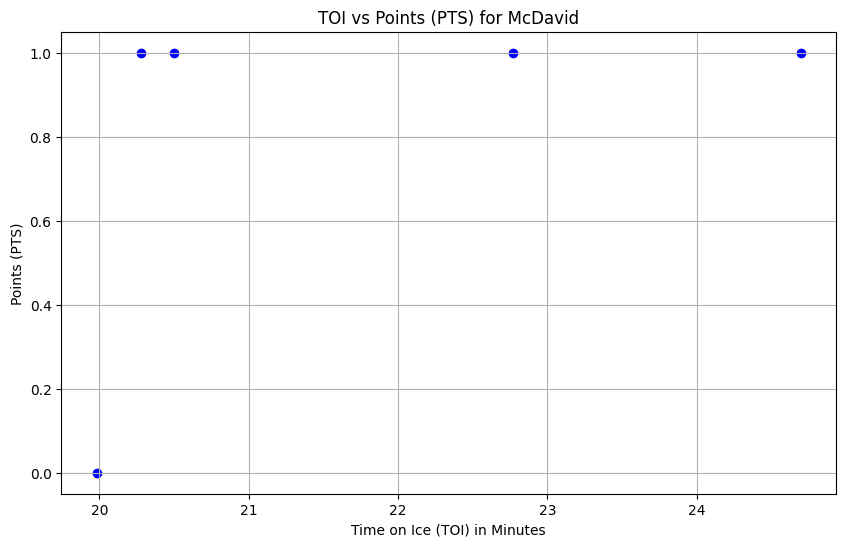

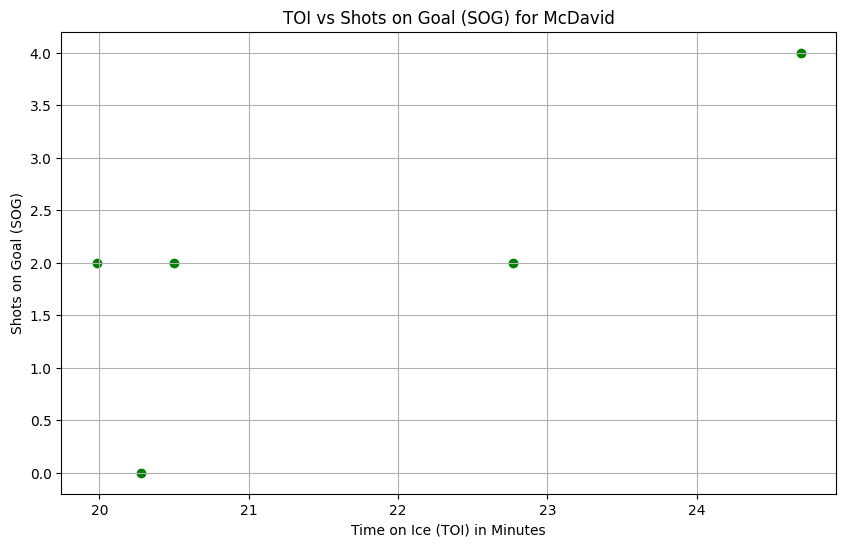

In [456]:
correlation_toi_performance = hockey_df[["TOI_minutes", "PTS", "SOG"]].corr()
print("Correlation between TOI and performance (PTS, SOG):\n")
print(correlation_toi_performance)

#Calculates Goals per 60 minutes (G/60) and Assists per 60 minutes (A/60)
hockey_df["G_per_60"] = (hockey_df["Goals"] / hockey_df["TOI_minutes"]) * 60
hockey_df["A_per_60"] = (hockey_df["Assists"] / hockey_df["TOI_minutes"]) * 60

#Displays the updated dataframe with G/60 and A/60
print("\n\nG/60 represents McDavid's goals per 60 minutes of ice time, while A/60 represents his assists per 60 minutes. It is meant to show his efficiency regardless of time on ice.")
display(hockey_df[["Date", "G_per_60", "A_per_60"]])

#Displays correlation between TOI and per-minute contributions
correlation_toi = hockey_df[["TOI_minutes", "G_per_60", "A_per_60"]].corr()
print("\nCorrelation between TOI and per-minute contributions (G/60, A/60):\n")
print(correlation_toi)

#Scatter plot for TOI vs Points 
plt.figure(figsize=(10, 6))
plt.scatter(hockey_df["TOI_minutes"], hockey_df["PTS"], color='blue', label='Points')
plt.title("TOI vs Points (PTS) for McDavid")
plt.xlabel("Time on Ice (TOI) in Minutes")
plt.ylabel("Points (PTS)")
plt.grid(True)
plt.show()

#Scatter plot for TOI vs Shots on Goal 
plt.figure(figsize=(10, 6))
plt.scatter(hockey_df["TOI_minutes"], hockey_df["SOG"], color='green', label='Shots on Goal')
plt.title("TOI vs Shots on Goal (SOG) for McDavid")
plt.xlabel("Time on Ice (TOI) in Minutes")
plt.ylabel("Shots on Goal (SOG)")
plt.grid(True)
plt.show()

___________________________________________________________________________________________________________________________

### Hockey Analysis Conclusion

Judging by the correlation results, it appears that for McDavid, more ice time generally leads to more shots on goal, but the relationship with scoring points is moderate.

McDavid has been more efficient at assisting than scoring goals per 60 minutes for the 5 games analyzed, and his assist contributions are notably high even with a few minutes less of ice time.
The NaN value for G/60 indicates that no meaningful data available, which is because McDavid didn't score during the 5 observed games. 

The lack of correlation between shots and points, alongside the absence of goals per 60 minutes in the observed period, suggests that factors beyond just ice time and shots have influenced McDavid's goal-scoring abilities for these past 5 games. The player might be in a bigger slump or having health issues. 

The visualizations suggest that Connor McDavid overall performed better for the 5 games with more ice time, rather than less. 

___________________________________________________________________________________________________________________________

### Baseball Dataset Tidying

Now, I'm going to go through a similar clean-up process for the next dataset. 
First, I removed the last 2 rows since they were just aggregates of the entire dataset. I also replaced the 3 missing values in the awards column with 0, since this wouldn't really affect the dataset.
Then I added a new column that separates the primary position. This is because any position after the / in the position column indicates that the player only played in that position for fewer than 10 games, meaning that the first position is what they mostly played as. 
I added 2 new columns that calculate the isolated power(raw power of a hitter) and homerun percentages. Also calculated the strikeout and the walk rates.



In [457]:
baseball_df = pd.read_csv("baseball_stats.csv")
#Displays the untidy dataset
display(baseball_df)

,Season,Age,Team,Lg,WAR,G,PA,AB,R,H,...,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards
0,2016,24,NYY,AL,-0.3,27,95,84,10,15,...,0.272,60,29,2,1,0,1,0,9/H,NaN
1,2017,25,NYY,AL,8.0,155,678,542,128,154,...,0.435,172,340,15,5,0,4,11,*9D/H,ASMVP-2ROY-1SS
2,2018,26,NYY,AL,5.9,112,498,413,77,115,...,0.396,152,218,10,4,0,5,3,9D/H8,ASMVP-12
3,2019,27,NYY,AL,5.6,102,447,378,75,103,...,0.393,148,204,11,3,0,1,4,9D/H,NaN
4,2020,28,NYY,AL,1.1,28,114,101,23,26,...,0.379,145,56,5,2,0,0,0,9/DH,NaN
5,2021,29,NYY,AL,6.1,148,633,550,89,158,...,0.392,150,299,16,3,0,5,2,*98D/H,ASMVP-4SS
6,2022,30,NYY,AL,10.5,157,696,570,133,177,...,0.463,208,391,14,6,0,5,19,*89D/H,ASMVP-1SS
7,2023,31,NYY,AL,4.5,106,458,367,79,98,...,0.421,172,225,5,0,0,3,9,9D8/H,ASMVP-15
8,2024,32,NYY,AL,10.8,158,704,559,122,180,...,0.484,223,392,22,9,0,2,20,*8D/97,ASMVP-1SS
9,9 Yrs,9 Yrs,9 Yrs,9 Yrs,52.2,993,4323,3564,736,1026,...,0.425,174,2154,100,33,0,26,68,98DH/7,NaN


In [458]:
#Drops the last 2 irrelevant rows
baseball_df = baseball_df.iloc[:-2]

#Replaces the only missing value with 0
baseball_df.fillna(0, inplace=True)

#Adds a new column separating the primary position
baseball_df["Primary_Pos"] = baseball_df["Pos"].str.split("/").str[0]
#Adds a new column calculating the isolated power
baseball_df["ISO"] = (baseball_df["SLG"] - baseball_df["BA"]).round(3)
#Adds a new column calculating Home Run Percentage
baseball_df["HR_per_AB_percent"] = ((baseball_df["HR"] / baseball_df["AB"]) * 100).round(3)
#Adds a new column calculating Strikeout rate
baseball_df["K%"] = ((baseball_df["SO"] / baseball_df["PA"]) * 100).round(3)
#Adds a new column calculating Walk rate
baseball_df["BB%"] = ((baseball_df["BB"] / baseball_df["PA"]) * 100).round(3)

#Checks to see if data types are as desired
print(baseball_df.dtypes)

Season                object
Age                   object
Team                  object
Lg                    object
WAR                  float64
G                      int64
PA                     int64
AB                     int64
R                      int64
H                      int64
2B                     int64
3B                     int64
HR                     int64
RBI                    int64
SB                     int64
CS                     int64
BB                     int64
SO                     int64
BA                   float64
OBP                  float64
SLG                  float64
OPS                  float64
OPS+                   int64
rOBA                 float64
Rbat+                  int64
TB                     int64
GIDP                   int64
HBP                    int64
SH                     int64
SF                     int64
IBB                    int64
Pos                   object
Awards                object
Primary_Pos           object
ISO           

In [459]:
#Displays the tidy dataset
display(baseball_df)

,Season,Age,Team,Lg,WAR,G,PA,AB,R,H,...,SH,SF,IBB,Pos,Awards,Primary_Pos,ISO,HR_per_AB_percent,K%,BB%
0,2016,24,NYY,AL,-0.3,27,95,84,10,15,...,0,1,0,9/H,0,9,0.166,4.762,44.211,9.474
1,2017,25,NYY,AL,8.0,155,678,542,128,154,...,0,4,11,*9D/H,ASMVP-2ROY-1SS,*9D,0.343,9.594,30.678,18.732
2,2018,26,NYY,AL,5.9,112,498,413,77,115,...,0,5,3,9D/H8,ASMVP-12,9D,0.250,6.538,30.522,15.261
3,2019,27,NYY,AL,5.6,102,447,378,75,103,...,0,1,4,9D/H,0,9D,0.268,7.143,31.544,14.318
4,2020,28,NYY,AL,1.1,28,114,101,23,26,...,0,0,0,9/DH,0,9,0.297,8.911,28.070,8.772
5,2021,29,NYY,AL,6.1,148,633,550,89,158,...,0,5,2,*98D/H,ASMVP-4SS,*98D,0.257,7.091,24.961,11.848
6,2022,30,NYY,AL,10.5,157,696,570,133,177,...,0,5,19,*89D/H,ASMVP-1SS,*89D,0.375,10.877,25.144,15.948
7,2023,31,NYY,AL,4.5,106,458,367,79,98,...,0,3,9,9D8/H,ASMVP-15,9D8,0.346,10.082,28.384,19.214
8,2024,32,NYY,AL,10.8,158,704,559,122,180,...,0,2,20,*8D/97,ASMVP-1SS,*8D,0.379,10.376,24.290,18.892


___________________________________________________________________________________________________________________________

### Baseball Dataset Analysis

Now, for the analysis part, I will simply do some visualizations for multiple different trends for Aaron Judge over the years, as was suggested in my classmate's post. Included are the batting average, home run count, wins above replacement, games played, on-base and slugging percentages, all of which measured over the seasons. I also calculated correlations between different metrics to see if there are any relationships.

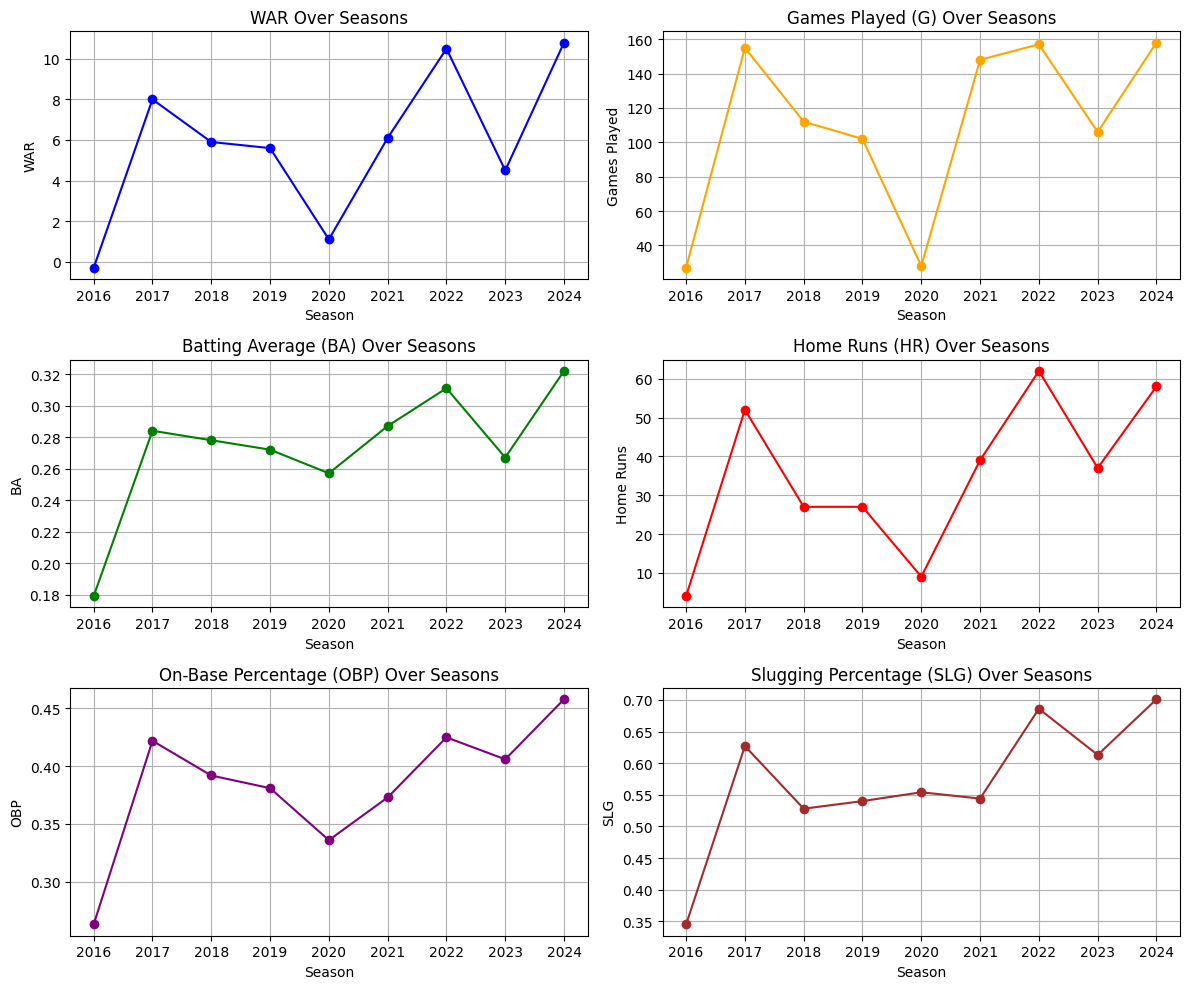

In [460]:
plt.figure(figsize=(12, 10))

#Plotting WAR
plt.subplot(3, 2, 1)
plt.plot(baseball_df["Season"], baseball_df["WAR"], label="WAR", color="blue", marker="o")
plt.title("WAR Over Seasons")
plt.xlabel("Season")
plt.ylabel("WAR")
plt.grid(True)

#Plots Games Played
plt.subplot(3, 2, 2)
plt.plot(baseball_df["Season"], baseball_df["G"], label="Games Played (G)", color="orange", marker="o")
plt.title("Games Played (G) Over Seasons")
plt.xlabel("Season")
plt.ylabel("Games Played")
plt.grid(True)

#Plots Batting Average
plt.subplot(3, 2, 3)
plt.plot(baseball_df["Season"], baseball_df["BA"], label="Batting Average (BA)", color="green", marker="o")
plt.title("Batting Average (BA) Over Seasons")
plt.xlabel("Season")
plt.ylabel("BA")
plt.grid(True)

#Plot Home Runs
plt.subplot(3, 2, 4)
plt.plot(baseball_df["Season"], baseball_df["HR"], label="Home Runs (HR)", color="red", marker="o")
plt.title("Home Runs (HR) Over Seasons")
plt.xlabel("Season")
plt.ylabel("Home Runs")
plt.grid(True)

#Plots On-Base Percentage
plt.subplot(3, 2, 5)
plt.plot(baseball_df["Season"], baseball_df["OBP"], label="On-Base Percentage (OBP)", color="purple", marker="o")
plt.title("On-Base Percentage (OBP) Over Seasons")
plt.xlabel("Season")
plt.ylabel("OBP")
plt.grid(True)

#Plots Slugging Percentage
plt.subplot(3, 2, 6)
plt.plot(baseball_df["Season"], baseball_df["SLG"], label="Slugging Percentage (SLG)", color="brown", marker="o")
plt.title("Slugging Percentage (SLG) Over Seasons")
plt.xlabel("Season")
plt.ylabel("SLG")
plt.grid(True)

plt.tight_layout()
plt.show()

In [461]:
#Calculates correlation between HR and Games Played
hr_games_corr = baseball_df[["HR", "G"]].corr()
print("Correlation between HR and Games Played (G):")
print(hr_games_corr)

#Calculates correlation between OBP and SLG
obp_slg_corr = baseball_df[["OBP", "SLG"]].corr()
print("\nCorrelation between OBP and SLG:")
print(obp_slg_corr)

#Calculates correlation between BA and WAR
ba_war_corr = baseball_df[["BA", "WAR"]].corr()
print("\nCorrelation between BA and WAR:")
print(ba_war_corr)

Correlation between HR and Games Played (G):
          HR         G
HR  1.000000  0.945418
G   0.945418  1.000000

Correlation between OBP and SLG:
          OBP       SLG
OBP  1.000000  0.938897
SLG  0.938897  1.000000

Correlation between BA and WAR:
           BA       WAR
BA   1.000000  0.903919
WAR  0.903919  1.000000


___________________________________________________________________________________________________________________________

### Baseball Analysis Conclusion

The correlation results show that Aaron Judge's performance is influenced by his playing time, his ability to get on base, and his slugging power. His home run total is strongly linked to the number of games he plays, while his OBP and SLG show that he excels in both getting on base and hitting for power. His batting average has a direct and significant impact on his overall value, suggesting that Judge's consistent ability to make contact and get hits is crucial to his performance and value to the team. 

The visualizations suggest that in 2020, Judge's performance suffered quite a bit, perhaps due to COVID-19 or other reasons. It appears that the stats are consistent amongst each other, so that whenever Judge is going through a slump, like in 2023, that is reflected fairly evently in all the stats, there are no outliers. The same applies to when he has had peaks.

___________________________________________________________________________________________________________________________

### Student Dataset Tidying

This dataset was cleaned up by first splitting the sex and age columns, then melting down the term score columns to be in one column. Then I dropped any potential duplicates and converted the age and score columns to integers.

In [462]:
student_df = pd.read_csv("students_data.csv")
#Displays the untidy dataset
display(student_df)

,id,name,phone,sex and age,test number,term 1,term 2,term 3
0,1,Mike,134,m_12,test 1,76,84,87
1,2,Linda,270,f_13,test 1,88,90,73
2,3,Sam,210,m_11,test 1,78,74,80
3,4,Esther,617,f_12,test 1,68,75,74
4,5,Mary,114,f_14,test 1,65,67,64
5,1,Mike,134,m_12,test 2,85,80,90
6,2,Linda,270,f_13,test 2,87,82,94
7,3,Sam,210,m_11,test 2,80,87,80
8,4,Esther,617,f_12,test 2,70,75,78
9,5,Mary,114,f_14,test 2,68,70,63


In [463]:
#Splits up the sex and age columns and drops the sex and age column
student_df[["sex", "age"]] = student_df["sex and age"].str.split('_', expand=True)
student_df = student_df.drop(columns=["sex and age"])


#Melting down the data to display term grades in one column instead of 3
student_df = student_df.melt(
    id_vars=["id", "name", "phone", "sex", "age", "test number"], 
    value_vars=["term 1", "term 2", "term 3"], 
    var_name="term", 
    value_name="score"
)

#Drops any potential duplicate rows
student_df = student_df.drop_duplicates()
#Converts age and score columns to integers
student_df[["age", "score"]] = student_df[["age", "score"]].astype(int)


#Checks to see if data types are as desired
print(student_df.dtypes)

id              int64
name           object
phone           int64
sex            object
age             int32
test number    object
term           object
score           int32
dtype: object


In [465]:
#Displays the tidy dataset
display(student_df)

,id,name,phone,sex,age,test number,term,score
0,1,Mike,134,m,12,test 1,term 1,76
1,2,Linda,270,f,13,test 1,term 1,88
2,3,Sam,210,m,11,test 1,term 1,78
3,4,Esther,617,f,12,test 1,term 1,68
4,5,Mary,114,f,14,test 1,term 1,65
5,1,Mike,134,m,12,test 2,term 1,85
6,2,Linda,270,f,13,test 2,term 1,87
7,3,Sam,210,m,11,test 2,term 1,80
8,4,Esther,617,f,12,test 2,term 1,70
9,5,Mary,114,f,14,test 2,term 1,68


___________________________________________________________________________________________________________________________

### Student Dataset Analysis

It was suggested to analyze the performance trends, as well as to make a gender-based analysis between the male and the female students, and then we could also take a look at the age impact, all of which can be examined by comparing averages of scores. I also analyzed the score improvement from the first term and the second term for every student.

In [466]:
#Average score per term
avg_score_per_term = student_df.groupby("term")["score"].mean().reset_index()
print("\n The average score per term is: ")
print(avg_score_per_term)

#Average score per term by gender
avg_score_by_gender = student_df.groupby(["sex", "term"])["score"].mean().reset_index()
print("\n The average score per term per gender is: ")
print(avg_score_by_gender)

#Average score per age group
avg_score_by_age = student_df.groupby("age")["score"].mean().reset_index()
print("\n The average score per age group is: ")
print(avg_score_by_age)


 The average score per term is: 
     term  score
0  term 1   76.5
1  term 2   78.4
2  term 3   78.3

 The average score per term per gender is: 
  sex    term      score
0   f  term 1  74.333333
1   f  term 2  76.500000
2   f  term 3  74.333333
3   m  term 1  79.750000
4   m  term 2  81.250000
5   m  term 3  84.250000

 The average score per age group is: 
   age      score
0   11  79.833333
1   12  78.500000
2   13  85.666667
3   14  66.166667


In [467]:
#Analyzing performance improvement from term 1 to term 2

#Filters students for only term 1 and term 2
term_1_2_df = student_df[student_df["term"].isin(["term 1", "term 2"])]

#Pivots the data so we have term 1 and term 2 scores side by side
term_comparison = term_1_2_df.pivot_table(index=["id", "name", "sex", "age"], 
                                          columns="term", 
                                          values="score").reset_index()

#Calculates the difference in scores between term 2 and term 1 and adds it to the new dataframe
term_comparison["score_improvement"] = term_comparison["term 2"] - term_comparison["term 1"]

#Performance improvement from term 1 to 2
print("\n The Performance improvement from term 1 to term 2 is: \n")
print(term_comparison)


 The Performance improvement from term 1 to term 2 is: 

term  id    name sex  age  term 1  term 2  score_improvement
0      1    Mike   m   12    80.5    82.0                1.5
1      2   Linda   f   13    87.5    86.0               -1.5
2      3     Sam   m   11    79.0    80.5                1.5
3      4  Esther   f   12    69.0    75.0                6.0
4      5    Mary   f   14    66.5    68.5                2.0


___________________________________________________________________________________________________________________________

### Student Analysis Conclusion

The results from the analysis indicate that overall, male students tended to perform better than female students, with higher scores across the terms and consistent improvement. Esther, however, was the one female student that was an outlier and had a significant improvement.

Just by looking at the tidied up data, we can see that Linda actually performs quite well her students, but the average gender score is brought down by the other female students.

The age group analysis indicated that younger students (ages 11 and 12) performed significantly better than the 14 year olds, which were at the bottom, but the 13 year olds were overall the highest achievers. 

While there was an overall positive trend in performance from Term 1 to Term 2, not all students showed improvement. Some students (like Linda) had a decline in performance. The second term was the term with the highest overall performance, while the first had the lowest. 